# **라이브러리**

In [2]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

# **함수모음**

## **모델링**

In [3]:
def modeling(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < 0.5)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

def modeling_(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred
    

## **스코어**

In [4]:
def scoring(y_true, y_pred):
    print('accuracy:', accuracy_score(y_true,y_pred))
    print('f1-Score:', f1_score(y_true, y_pred, average='macro'))
    print('Recall:',recall_score(y_true, y_pred, average='macro'))
    print('Precision:',precision_score(y_true, y_pred, average='macro'))
    print(confusion_matrix(y_true, y_pred))

# **데이터 나누기**

In [49]:
dataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\0y_finan.csv')
dataset1 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\1y_finan.csv')
dataset2 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\2y_finan.csv')
dataset3 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\3y_finan.csv')
dataset4 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\4y_finan.csv')

dataset.shape

(26832, 17)

In [52]:
dataset.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도'],
      dtype='object')

In [50]:
def splittrain(data):
    subdata = data.sort_values(by='년').reset_index(drop=True)
    data = subdata.loc[subdata['년'] < 2015]
    return data

def splittesst(data):
    global test
    subdata = data.sort_values(by='년').reset_index(drop=True)
    test = subdata.loc[subdata['년'] >= 2015]
    return test

In [51]:
dataset_ = splittrain(dataset)
test_ = splittesst(dataset)
dataset1_ = splittrain(dataset1)
test1_ = splittesst(dataset1)
dataset2_ = splittrain(dataset2)
test2_ = splittesst(dataset2)
dataset3_ = splittrain(dataset3)
test3_ = splittesst(dataset3)
dataset4_ = splittrain(dataset4)
test4_ = splittesst(dataset4)

In [53]:
drop_feature = ['회사명', '거래소코드', '회계년도','년', 'key', '부도']

In [54]:
X = dataset_.drop(drop_feature, axis=1)
X1 = dataset1_.drop(drop_feature, axis=1)
X2 = dataset2_.drop(drop_feature, axis=1)
X3 = dataset3_.drop(drop_feature, axis=1)
X4 = dataset4_.drop(drop_feature, axis=1)

y = dataset_['부도']
y1 = dataset1_['부도']
y2 = dataset2_['부도']
y3 = dataset3_['부도']
y4 = dataset4_['부도']


In [55]:
X_test =test_.drop(drop_feature, axis=1)
X1_test =test1_.drop(drop_feature, axis=1)
X2_test =test2_.drop(drop_feature, axis=1)
X3_test =test3_.drop(drop_feature, axis=1)
X4_test =test4_.drop(drop_feature, axis=1)

y_test= test_['부도']
y1_test =test1_['부도']
y2_test =test2_['부도']
y3_test =test3_['부도']
y4_test =test4_['부도']

# **YEAR**

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 488)
X_train , y_train = RandomUnderSampler(random_state=1).fit_resample(X , y)

In [57]:
dt_clf = modeling(DecisionTreeClassifier(), X_train, y_train, X_test)
rf_clf = modeling(RandomForestClassifier(),X_train, y_train, X_test)
ada_clf = modeling(AdaBoostClassifier(), X_train, y_train, X_test)
lg_clf = modeling(LogisticRegression(), X_train, y_train, X_test)
knn_clf = modeling(KNeighborsClassifier(), X_train, y_train, X_test)
svc_clf = modeling(SVC(probability=True), X_train, y_train, X_test)
lgmb_clf = modeling(LGBMClassifier(), X_train, y_train, X_test)
cat_clf = modeling(CatBoostClassifier(silent=True),X_train, y_train, X_test)
mlp_clf = modeling(MLPClassifier(),X_train, y_train, X_test)
xgb_clf = modeling(XGBClassifier(),X_train, y_train, X_test)

[02:13:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
print(scoring(y_test , dt_clf))
print('-'*60)
print(scoring(y_test , rf_clf))
print('-'*60)
print(scoring(y_test , ada_clf))
print('-'*60)
print(scoring(y_test , lg_clf))
print('-'*60)
print(scoring(y_test , knn_clf))
print('-'*60)
print(scoring(y_test , svc_clf))
print('-'*60)
print(scoring(y_test , lgmb_clf))
print('-'*60)
print(scoring(y_test , cat_clf))
print('-'*60)
print(scoring(y_test , mlp_clf))
print('-'*60)
print(scoring(y_test , xgb_clf))
print('-'*60)

accuracy: 0.6997883349012229
f1-Score: 0.4246052307791387
Recall: 0.6802064286240548
Precision: 0.505292655002695
[[5916 2535]
 [  18   35]]
None
------------------------------------------------------------
accuracy: 0.8190263405456256
f1-Score: 0.47643878607253765
Recall: 0.8151977102185072
Precision: 0.5129555522274543
[[6922 1529]
 [  10   43]]
None
------------------------------------------------------------
accuracy: 0.8179680150517403
f1-Score: 0.47308700229782596
Recall: 0.7677912405141292
Precision: 0.5110124247331213
[[6918 1533]
 [  15   38]]
None
------------------------------------------------------------
accuracy: 0.7174270931326434
f1-Score: 0.4348985548221583
Recall: 0.7734542970241325
Precision: 0.5082819502291853
[[6057 2394]
 [   9   44]]
None
------------------------------------------------------------
accuracy: 0.8563029162746942
f1-Score: 0.48893818583690424
Recall: 0.7683293034429329
Precision: 0.5133341166130408
[[7246 1205]
 [  17   36]]
None
-------------------

# **1YEAR AGO**

In [40]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state = 488)
X1_train , y1_train = RandomUnderSampler(random_state=0).fit_resample(X1 , y1)

In [41]:
dt_clf1 = modeling(DecisionTreeClassifier(), X1_train, y1_train, X1_test)
rf_clf1 = modeling(RandomForestClassifier(),X1_train, y1_train, X1_test)
ada_clf1 = modeling(AdaBoostClassifier(), X1_train, y1_train, X1_test)
lg_clf1 = modeling(LogisticRegression(), X1_train, y1_train, X1_test)
knn_clf1 = modeling(KNeighborsClassifier(), X1_train, y1_train, X1_test)
svc_clf1 = modeling(SVC(probability=True), X1_train, y1_train, X1_test)
lgmb_clf1 = modeling(LGBMClassifier(), X1_train, y1_train, X1_test)
cat_clf1 = modeling(CatBoostClassifier(silent=True),X1_train, y1_train, X1_test)
mlp_clf1 = modeling(MLPClassifier(),X1_train, y1_train, X1_test)
xgb_clf1 = modeling(XGBClassifier(),X1_train, y1_train, X1_test)

[02:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
print(scoring(y1_test , dt_clf1))
print('-'*60)
print(scoring(y1_test , rf_clf1))
print('-'*60)
print(scoring(y1_test , ada_clf1))
print('-'*60)
print(scoring(y1_test , lg_clf1))
print('-'*60)
print(scoring(y1_test , knn_clf1))
print('-'*60)
print(scoring(y1_test , svc_clf1))
print('-'*60)
print(scoring(y1_test , lgmb_clf1))
print('-'*60)
print(scoring(y1_test , cat_clf1))
print('-'*60)
print(scoring(y1_test , mlp_clf1))
print('-'*60)
print(scoring(y1_test , xgb_clf1))
print('-'*60)

accuracy: 0.6509877704609596
f1-Score: 0.4068196346516857
Recall: 0.7416430148218227
Precision: 0.5059399224806201
[[5496 2960]
 [   8   40]]
None
------------------------------------------------------------
accuracy: 0.7429444967074318
f1-Score: 0.44351034318671856
Recall: 0.787882371491643
Precision: 0.50838079783979
[[6278 2178]
 [   8   40]]
None
------------------------------------------------------------
accuracy: 0.7538805268109126
f1-Score: 0.44612356054961094
Recall: 0.7519512771996215
Precision: 0.5075631898432094
[[6375 2081]
 [  12   36]]
None
------------------------------------------------------------
accuracy: 0.811618062088429
f1-Score: 0.4709569788249329
Recall: 0.8120565279091769
Precision: 0.511293698212696
[[6863 1593]
 [   9   39]]
None
------------------------------------------------------------
accuracy: 0.753645343367827
f1-Score: 0.446467542152374
Recall: 0.762190555029959
Precision: 0.5078606370070547
[[6372 2084]
 [  11   37]]
None
---------------------------

# **2YEARS AGO**

In [63]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state = 488)
X2_train , y2_train = RandomUnderSampler(random_state=1).fit_resample(X2 , y2)

In [64]:
dt_clf2 = modeling(DecisionTreeClassifier(), X2_train, y2_train, X2_test)
rf_clf2 = modeling(RandomForestClassifier(),X2_train, y2_train, X2_test)
ada_clf2 = modeling(AdaBoostClassifier(), X2_train, y2_train, X2_test)
lg_clf2 = modeling(LogisticRegression(), X2_train, y2_train, X2_test)
knn_clf2 = modeling(KNeighborsClassifier(), X2_train, y2_train, X2_test)
svc_clf2 = modeling(SVC(probability=True), X2_train, y2_train, X2_test)
lgmb_clf2 = modeling(LGBMClassifier(), X2_train, y2_train, X2_test)
cat_clf2 = modeling(CatBoostClassifier(silent=True),X2_train, y2_train, X2_test)
mlp_clf2 = modeling(MLPClassifier(),X2_train, y2_train, X2_test)
xgb_clf2 = modeling(XGBClassifier(),X2_train, y2_train, X2_test)

[02:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
print(scoring(y2_test , dt_clf2))
print('-'*60)
print(scoring(y2_test , rf_clf2))
print('-'*60)
print(scoring(y2_test , ada_clf2))
print('-'*60)
print(scoring(y2_test , lg_clf2))
print('-'*60)
print(scoring(y2_test , knn_clf2))
print('-'*60)
print(scoring(y2_test , svc_clf2))
print('-'*60)
print(scoring(y2_test , lgmb_clf2))
print('-'*60)
print(scoring(y2_test , cat_clf2))
print('-'*60)
print(scoring(y2_test , mlp_clf2))
print('-'*60)
print(scoring(y2_test , xgb_clf2))
print('-'*60)

accuracy: 0.5798447789275635
f1-Score: 0.37443665715519764
Recall: 0.6119727837543183
Precision: 0.5024168249985768
[[4902 3557]
 [  16   29]]
None
------------------------------------------------------------
accuracy: 0.7079021636876763
f1-Score: 0.4262957244290452
Recall: 0.6984460994864116
Precision: 0.505031437366749
[[5989 2470]
 [  14   31]]
None
------------------------------------------------------------
accuracy: 0.714722483537159
f1-Score: 0.4292999522542575
Recall: 0.7129264031734773
Precision: 0.5054711829923273
[[6046 2413]
 [  13   32]]
None
------------------------------------------------------------
accuracy: 0.794214487300094
f1-Score: 0.4574160960092776
Recall: 0.6976238326043267
Precision: 0.5063404935161371
[[6727 1732]
 [  18   27]]
None
------------------------------------------------------------
accuracy: 0.7070790216368767
f1-Score: 0.42597862025170163
Recall: 0.6980323389946277
Precision: 0.5050127783221775
[[5982 2477]
 [  14   31]]
None
----------------------

In [32]:
scoring(y2_test , cat_clf2)

accuracy: 0.69379115710254
f1-Score: 0.4211990239190028
Recall: 0.7024050649538296
Precision: 0.5049946314186765
[[5868 2591]
 [  13   32]]


# **3YEARS AGO**

In [22]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state = 488)
X3_train , y3_train = RandomUnderSampler(random_state=0).fit_resample(X3 , y3)

dt_clf3 = modeling(DecisionTreeClassifier(), X3_train, y3_train, X3_test)
rf_clf3 = modeling(RandomForestClassifier(),X3_train, y3_train, X3_test)
ada_clf3 = modeling(AdaBoostClassifier(), X3_train, y3_train, X3_test)
lg_clf3 = modeling(LogisticRegression(), X3_train, y3_train, X3_test)
knn_clf3 = modeling(KNeighborsClassifier(), X3_train, y3_train, X3_test)
svc_clf3 = modeling(SVC(probability=True), X3_train, y3_train, X3_test)
lgmb_clf3 = modeling(LGBMClassifier(), X3_train, y3_train, X3_test)
cat_clf3 = modeling(CatBoostClassifier(silent=True),X3_train, y3_train, X3_test)
mlp_clf3 = modeling(MLPClassifier(),X3_train, y3_train, X3_test)
xgb_clf3 = modeling(XGBClassifier(),X3_train, y3_train, X3_test)

[19:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
models = CatBoostClassifier(silent=True)
models.fit(X3_train,y3_train)
accuracy_score(y3_val, models.predict(X3_val))

0.7220403709765412

In [24]:
scoring(y3_test , cat_clf3)

accuracy: 0.6000705550329257
f1-Score: 0.3815436851040985
Recall: 0.6634238739657226
Precision: 0.5026284465997967
[[5079 3392]
 [   9   24]]


# **4YEARS AGO**

In [25]:
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, stratify=y4, random_state = 488)
X4_train , y4_train = RandomUnderSampler(random_state=0).fit_resample(X4 , y4)

dt_clf4 = modeling(DecisionTreeClassifier(), X4_train, y4_train, X4_test)
rf_clf4 = modeling(RandomForestClassifier(),X4_train, y4_train, X4_test)
ada_clf4 = modeling(AdaBoostClassifier(), X4_train, y4_train, X4_test)
lg_clf4 = modeling(LogisticRegression(), X4_train, y4_train, X4_test)
knn_clf4 = modeling(KNeighborsClassifier(), X4_train, y4_train, X4_test)
svc_clf4 = modeling(SVC(probability=True), X4_train, y4_train, X4_test)
lgmb_clf4 = modeling(LGBMClassifier(), X4_train, y4_train, X4_test)
cat_clf4 = modeling(CatBoostClassifier(silent=True),X4_train, y4_train, X4_test)
mlp_clf4 = modeling(MLPClassifier(),X4_train, y4_train, X4_test)
xgb_clf4 = modeling(XGBClassifier(),X4_train, y4_train, X4_test)

[19:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
scoring(y4_test , cat_clf4)

accuracy: 0.644167450611477
f1-Score: 0.39615646094722873
Recall: 0.6402756639729053
Precision: 0.5015777129719637
[[5464 3018]
 [   8   14]]


<BarContainer object of 11 artists>

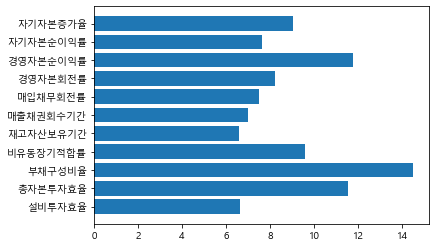

In [27]:
model = CatBoostClassifier(silent=True)
model.fit(X_train, y_train)
plt.barh(X_train.columns, model.feature_importances_ )